---

# <center>★ AI / ML Project - Image Denoising★
#### <center> ***Domain: Computer Vision***

<center><img src="https://raw.githubusercontent.com/Masterx-AI/Project_Image_denoising_using_Autoencoders/main/Autoencoders.png" style="width: 800px;"/>

---

### Description:

An autoencoder is a special type of neural network that is trained to copy its input to its output. For example, given an image of a handwritten digit, an autoencoder first encodes the image into a lower dimensional latent representation, then decodes the latent representation back to an image. An autoencoder learns to compress the data while minimizing the reconstruction error.

To learn more about autoencoders, please consider reading chapter 14 from Deep Learning by Ian Goodfellow, Yoshua Bengio, and Aaron Courville.


### Acknowledgement:
The dataset is referred from Google

### Objective:
- Understand the Dataset & perform necessary Preprocessing.
- Design a Neural Network Architecture - Autoencoder Model.
- Train the autoencoder model to carry out image denoising process.

---

# <center> Stractegic Plan of Action:

**We aim to solve the problem statement by creating a plan of action, Here are some of the necessary steps:**
1. Data Exploration
2. Data Pre-processing
3. Predictive Modelling
4. Project Outcomes & Conclusion

---

# <center>1. Data Exploration

In [1]:
# Importing the necessary libraries

import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt

from tensorflow.keras import layers
from tensorflow.keras.datasets import mnist
from tensorflow.keras.models import Model

In [2]:
# Since we only need images from the dataset to encode and decode, we
# won't use the labels.
(train_data, _), (test_data, _) = mnist.load_data()

def preprocess(array):
    """
    Normalizes the supplied array and reshapes it into the appropriate format.
    """

    array = array.astype("float32") / 255.0
    array = np.reshape(array, (len(array), 28, 28, 1))
    return array

# Normalize and reshape the data
train_data = preprocess(train_data)
test_data = preprocess(test_data)

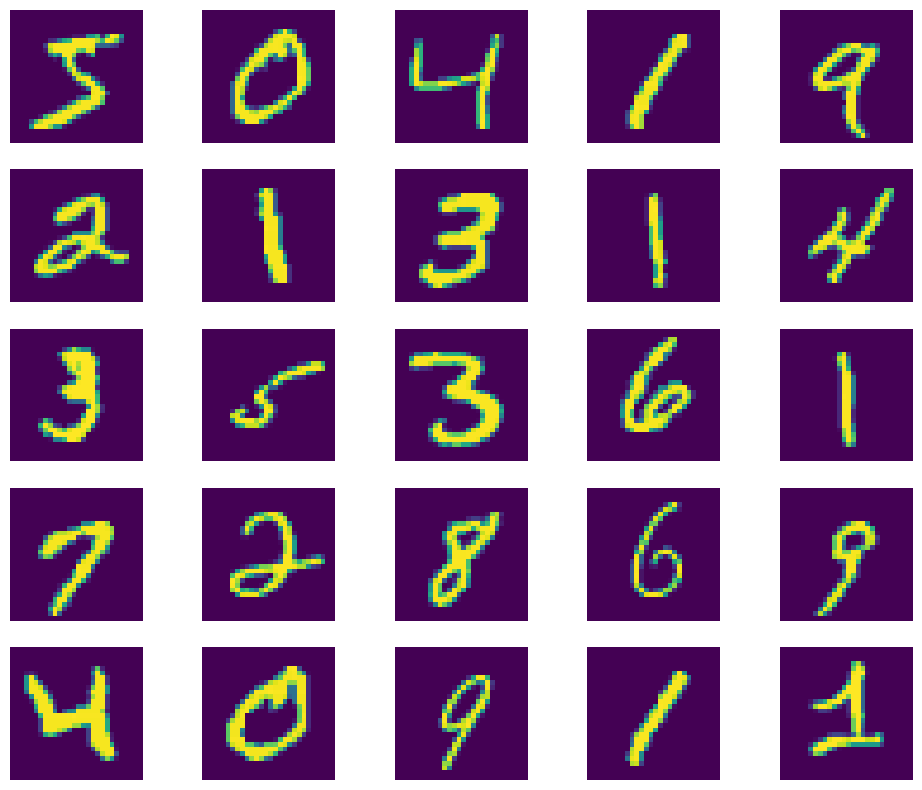

In [3]:
# Visualising the Dataset

n=25

plt.figure(figsize=[12,10])
for i in range(n):
    plt.subplot(5,5,i+1)
    plt.imshow(train_data[i])
    #plt.title(Class_names[y.numpy()])
    plt.axis('off')
plt.show()

---

# <center>2. Data Preprocessing

In [4]:
# Defining data preprocessing functions

def noise(array):
    """
    Adds random noise to each image in the supplied array.
    """

    noise_factor = 0.4
    noisy_array = array + noise_factor * np.random.normal(
        loc=0.0, scale=1.0, size=array.shape
    )

    return np.clip(noisy_array, 0.0, 1.0)


def display(array1, array2):
    """
    Displays ten random images from each one of the supplied arrays.
    """

    n = 10

    indices = np.random.randint(len(array1), size=n)
    images1 = array1[indices, :]
    images2 = array2[indices, :]

    plt.figure(figsize=(20, 4))
    for i, (image1, image2) in enumerate(zip(images1, images2)):
        ax = plt.subplot(2, n, i + 1)
        plt.imshow(image1.reshape(28, 28))
        plt.gray()
        ax.get_xaxis().set_visible(False)
        ax.get_yaxis().set_visible(False)

        ax = plt.subplot(2, n, i + 1 + n)
        plt.imshow(image2.reshape(28, 28))
        plt.gray()
        ax.get_xaxis().set_visible(False)
        ax.get_yaxis().set_visible(False)

    plt.show()

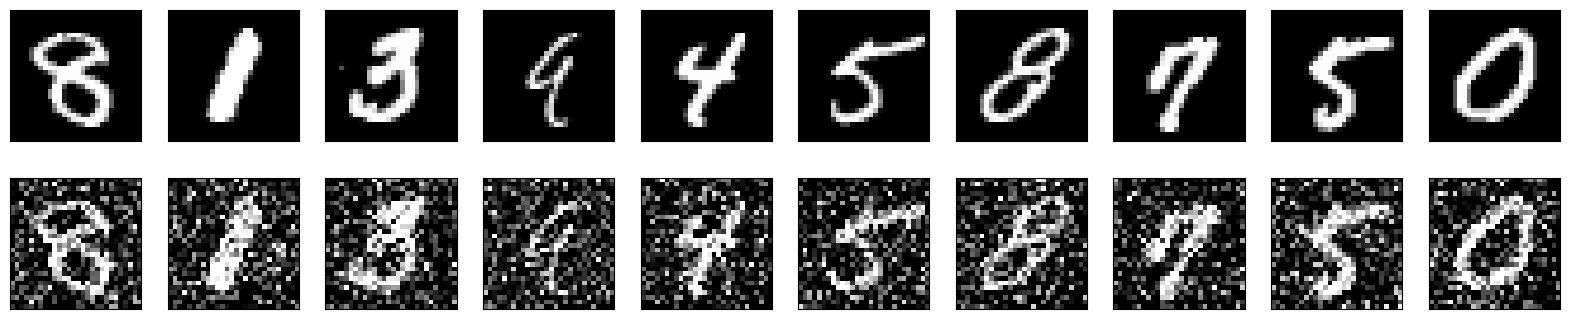

In [5]:
# Create a copy of the data with added noise
noisy_train_data = noise(train_data)
noisy_test_data = noise(test_data)

# Display the train data and a version of it with added noise
display(train_data, noisy_train_data)

---

# <center>3. Predictive Modelling

In [6]:
import keras
from keras import layers

input_img = keras.Input(shape=(28, 28, 1))

x = layers.Conv2D(16, (3, 3), activation='relu', padding='same')(input_img)
x = layers.MaxPooling2D((2, 2), padding='same')(x)
x = layers.Conv2D(8, (3, 3), activation='relu', padding='same')(x)
x = layers.MaxPooling2D((2, 2), padding='same')(x)
x = layers.Conv2D(8, (3, 3), activation='relu', padding='same')(x)
encoded = layers.MaxPooling2D((2, 2), padding='same')(x)

# at this point the representation is (4, 4, 8) i.e. 128-dimensional

x = layers.Conv2D(8, (3, 3), activation='relu', padding='same')(encoded)
x = layers.UpSampling2D((2, 2))(x)
x = layers.Conv2D(8, (3, 3), activation='relu', padding='same')(x)
x = layers.UpSampling2D((2, 2))(x)
x = layers.Conv2D(16, (3, 3), activation='relu')(x)
x = layers.UpSampling2D((2, 2))(x)
decoded = layers.Conv2D(1, (3, 3), activation='sigmoid', padding='same')(x)

autoencoder = keras.Model(input_img, decoded)
autoencoder.compile(optimizer='adam', loss='binary_crossentropy')

autoencoder.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 28, 28, 1)]       0         
                                                                 
 conv2d (Conv2D)             (None, 28, 28, 16)        160       
                                                                 
 max_pooling2d (MaxPooling2  (None, 14, 14, 16)        0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 14, 14, 8)         1160      
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 7, 7, 8)           0         
 g2D)                                                            
                                                                 
 conv2d_2 (Conv2D)           (None, 7, 7, 8)           584   

In [ ]:
# Training the Autoencoder Model

autoencoder.fit(
    x=noisy_train_data,
    y=train_data,
    epochs=100,
    batch_size=128,
    shuffle=True,
    validation_data=(noisy_test_data, test_data),
)

Epoch 1/100
469/469 [==============================] - 69s 136ms/step - loss: 0.2441 - val_loss: 0.1717
Epoch 2/100
469/469 [==============================] - 66s 141ms/step - loss: 0.1607 - val_loss: 0.1509
Epoch 3/100
469/469 [==============================] - 60s 129ms/step - loss: 0.1472 - val_loss: 0.1423
Epoch 4/100
469/469 [==============================] - 62s 132ms/step - loss: 0.1405 - val_loss: 0.1366
Epoch 5/100
469/469 [==============================] - 59s 126ms/step - loss: 0.1364 - val_loss: 0.1332
Epoch 6/100
469/469 [==============================] - 70s 149ms/step - loss: 0.1334 - val_loss: 0.1309
Epoch 7/100
469/469 [==============================] - 61s 129ms/step - loss: 0.1310 - val_loss: 0.1287
Epoch 8/100
469/469 [==============================] - 60s 128ms/step - loss: 0.1289 - val_loss: 0.1268
Epoch 9/100
469/469 [==============================] - 62s 132ms/step - loss: 0.1272 - val_loss: 0.1252
Epoch 10/100
469/469 [==============================] - 61s 129m

In [ ]:
# Evaluating the trained Autoencoder Model

predictions = autoencoder.predict(noisy_test_data)
display(noisy_test_data, predictions)

---

# <center>4. Outcomes & Project Conclusion

### Here are some of the key outcomes of the project:
- The  Image Dataset was large enough with 60k training samples & 10k testing samples.
- Visualising the image samples & it's distribution, helped us to get some insights into the dataset.
- Artificial data was created by adding noise to the existing image data.
- The Basic AutoEncoder Model performed surprisingly well in denoising the test images.
- Further improvisations can include the usage of advanced layers, or even utilizing the Transfer Learning Methodology to train Prebuilt Models.

In [ ]:
#<<<--------------------------------------THE END---------------------------------------->>>